In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data-mobile' 

In [7]:
image_exts = ['jpeg','jpg','bmp', 'png']

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data-mobile\damaged\111311466-close-up-of-broken-and-damaged-glass-of-mobile-phone-from-accident-on-floor.jpg
Image not in ext list data-mobile\damaged\111311467-close-up-of-broken-and-damaged-glass-of-mobile-phone-from-accident-on-floor.jpg
Image not in ext list data-mobile\damaged\2160px-Heavily_damaged_Nokia_mobile_phone2C_Winschoten_28201829_06.jpg
Image not in ext list data-mobile\damaged\39462108-old-damaged-mobile-phone-isolated-on-white-background-picture-of-a-macro-.jpg
Image not in ext list data-mobile\damaged\Broken-display-damage.jpg
Image not in ext list data-mobile\damaged\Broken-display-tape.jpg
Image not in ext list data-mobile\damaged\broken-mobile-phone-after-fall-260nw-1912413154.jpg
Image not in ext list data-mobile\damaged\iPhone-Screen-Fixed.jpg
Image not in ext list data-mobile\damaged\man-hand-take-broken-damaged-260nw-1724788414.jpg
Image not in ext list data-mobile\damaged\n-smartphone-from-the-ground-damaged-mobile-phone-with-cracked-tou

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data-mobile')

Found 388 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
data_iterator

In [13]:
batch= data_iterator.next()

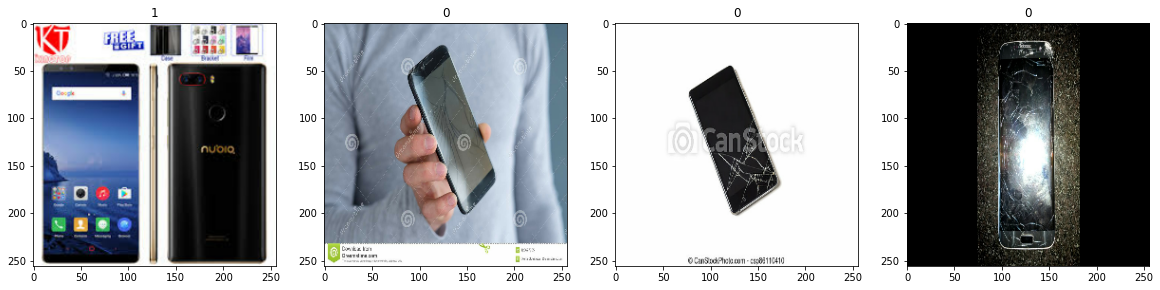

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
data = data.map(lambda x,y: (x/255, y))

In [16]:
len(data)

13

In [25]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [31]:
model = Sequential()

In [32]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [35]:
logdir='logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [37]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 25s 380ms/step - loss: 0.8799 - accuracy: 0.5035 - val_loss: 0.6256 - val_accuracy: 0.6771
Epoch 2/20
9/9 [==============================] - 3s 273ms/step - loss: 0.5844 - accuracy: 0.7222 - val_loss: 0.5526 - val_accuracy: 0.7188
Epoch 3/20
9/9 [==============================] - 3s 258ms/step - loss: 0.5273 - accuracy: 0.7153 - val_loss: 0.4860 - val_accuracy: 0.7917
Epoch 4/20
9/9 [==============================] - 3s 251ms/step - loss: 0.4284 - accuracy: 0.7917 - val_loss: 0.4185 - val_accuracy: 0.8542
Epoch 5/20
9/9 [==============================] - 3s 249ms/step - loss: 0.3331 - accuracy: 0.8646 - val_loss: 0.3229 - val_accuracy: 0.8229
Epoch 6/20
9/9 [==============================] - 3s 248ms/step - loss: 0.2655 - accuracy: 0.8958 - val_loss: 0.1679 - val_accuracy: 0.9688
Epoch 7/20
9/9 [==============================] - 3s 253ms/step - loss: 0.1760 - accuracy: 0.9201 - val_loss: 0.1380 - val_accuracy: 0.9583
Epoch 8/20
9/9 [===

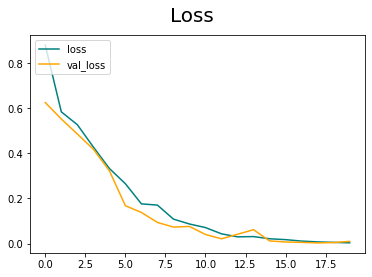

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

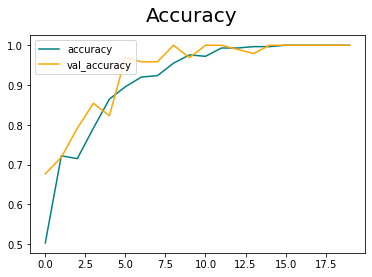

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [40]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [41]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [42]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 727ms/step


In [43]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [44]:
import cv2

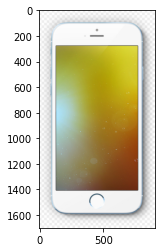

In [46]:
img = cv2.imread('mobile.jpg')
plt.imshow(img)
plt.show()

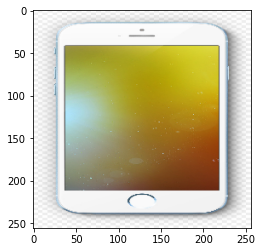

In [47]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [48]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 138ms/step


In [53]:
if yhat > 0.8: 
    print(f'Predicted class is Intact')
else:
    print(f'Predicted class is Damaged')

Predicted class is Intact


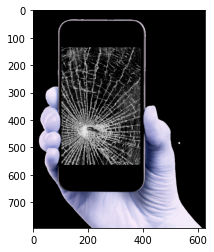

In [60]:
img = cv2.imread('mobile3.png')
plt.imshow(img)
plt.show()

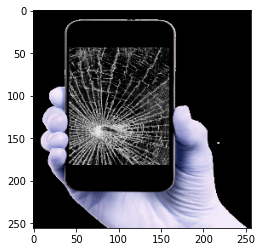

In [61]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [62]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [67]:
if yhat > 0.4: 
    print(f'Predicted class is Intact')
else:
    print(f'Predicted class is Damaged')

Predicted class is Damaged
